### Ex2.1
2 actions and $\epsilon = 0.5$, probability of greedy action being selected =   
$0.5+0.5*(\frac{1}{2}) = 0.75$  
Since $\epsilon = 0.5$, either it chose the greedy action in case 1 or if it's randomly going to choose, then it has two options to choose from. So two cases and in case 2 it has two choices to choose from. 

### Ex2.2
k = 4 actions 
Q1(a) = 0 initially for all a (expected value from action a) 

A1 = 1, R1 = -1, 
A2 = 2, R2 = 1, 
A3 = 2, R3 = -2, 
A4 = 2, R4 = 2, 
A5 = 3, R5 = 0

At some of these time steps e (epsilon) case may have occured i.e an action could have been selected at random. It is using the sample-average method.

$$Q_t(a) = \frac{\text{sum of rewards when taken prior to t}}{\text{number of times a taken prior to t}}$$

* Q1(a) = 0 (for all a)
___
* Q2(1) = $\frac{-1}{1} = -1$  
Q2($A - \{1\}$) = 0 (because haven't observed any other actions yet) (actions other than 1)  
___
* Q3(1) = -1  
Q3(2) = $\frac{1}{1} = 1$  
Q3($A - \{1,2\}$) = 0
___
* Q4(1) = -1  
Q4(2) =  $\frac{1+(-2)}{2} = \frac{-1}{2} = -0.5 $  
Q4($A - \{1,2\}$) = 0
___
* Q5(1) = -1  
Q5(2) = $\frac{1+(-2)+2}{3} = \frac{1}{3} = 0.33 $    
Q5($A - \{1,2\}$) = 0
___ 

Action |Q1 |Q2 |Q3 |Q4  |Q5
-------|---|---|---|--- |---
1      | 0 |-1 |-1 |-1  |-1  | 
2      | 0 | 0 | 1 |-0.5|0.33|
3      | 0 | 0 | 0 | 0  | 0  |
4      | 0 | 0 | 0 | 0  | 0  |
5      | 0 | 0 | 0 | 0  | 0  |
action taken | a1| a2| a2| a2| a3


* **Time steps at which this definitely occured** =   
t = 4 (because it should have picked a3,a4,a5 greedily but picked a2 instead)   

* **Time steps at which this could have possibly occured** =   
all of the time steps because it's definitely possible that it went into the $\epsilon$ case and then still picked the greedy choice 

### Ex 2.3
In the long run, $\epsilon = 0.01$ will perform better, because it will pick the optimal moves   
$$0.99 + 0.01*(1/10) = 0.99 + 0.001 = 0.991 = 99.1\% $$ of the time

(Case 1 where it picks greedy + case 2 and then in case 2 picks greedy randomly)*   

However in $\epsilon = 0.1$ it will pick the optimal moves  
$$0.9 + 0.1*(1/10) = 0.9 + 0.01 = 0.91 = 91\% $$ of the time 

So in the long run $\epsilon = 0.01$ will perform better, but $\epsilon = 0.1$ will improve faster.

** \* Made the assumption that there is only one greedy choice to pick from so 1/10 otherwise in practise it could be 2/10 or anything else, cause there could be more than on choice that is the greedy one **

### Ex 2.4 

Using non-constant step-size parameter $\alpha_n$ we get - 
$$ Q_{n+1} = \prod_{i=1}^{n} (1-\alpha_i) Q_1 + \sum_{i=1}^{n} \prod_{j=i+1}^{n} (1-\alpha_j) R_i $$

### Ex2.5

In [316]:
import numpy as np
import matplotlib.pyplot as plt
import random 
%matplotlib inline



k = 10
epsilon = 0.1 

#indexing actions by index in list so Q[0] is for a0 
q = [1]*k #initially they are all equal 
Q = [0]*k #intial estimates 
N = [0]*k #initial n values, number of times the action has occured essentially 


def bandit(action):
    """
    Returns reward for action by adding noise at each call to q  
    """
    global q
    noise = np.random.normal(0,0.01,10) #generate 10 values with mean 0 and sd 0.01 from a normal distribution
    q = np.add(q, noise)
    return q[action]
    #if you want noise in reward
    #return np.random.normal(q[action],1)    
    
def simActionVal(timeSteps, alpha=0):
    """
    When alpha = 0 (default)
    Simulates for specified time steps the sample average method i.e action value method 
    using alpha = 1/n 
    
    Otherwise (alpha != 0)
    Simulates for specified time steps the exponential recency-weighted average i.e action value method 
    using a constant alpha
    
    Returns rewards received as a list with index of the reward indicative of the time step 
    and whether it picked the optimal action or not for each time step as a list of 1's and 0's
    (1 = picked optimal, 0 = didn't pick optimal)
    """
    global q, Q , N
    
    rewards = [] #rewards received 
    pickedBestAction = [] #1 represents that it picked the optimal/best action 
    
    for a in range(timeSteps):
        if random.random()<epsilon: #pick an action randomly
            action = random.randint(0,k-1) #randint takes inclusive of upper bound
        else : 
            action = np.argmax(Q) #argMax_a Q(a)
        
        R = bandit(action) #reward 
        N[action] = N[action] + 1 
        
        rewards.append(R) #add the reward received at time step 'a' 
        bestAction = np.argmax(q)
        
        if bestAction == action: 
            pickedBestAction.append(1) 
        else:
            pickedBestAction.append(0)
        
        #Sample average
        if alpha == 0: 
            Q[action] = Q[action] + (1/N[action])*(R-Q[action]) 
        #constant alpha
        else :         
            Q[action] = Q[action] + (alpha)*(R-Q[action]) 
            
    return rewards,pickedBestAction

def reInit():
    """
    Re intialises values for q, Q and N 
    """
    global q, Q, N 
    q = [1]*k #initially they are all equal 
    Q = [0]*k #intial estimates 
    N = [0]*k #initial n values, number of times the action has occured essentially 






In [357]:
def simIndependentRuns(runs, timeSteps=10000, alpha=0):
    reInit()
    rMean = []
    optimalMean = []
    for a in range(runs):
        r,b = simActionVal(timeSteps,alpha)
        if a == 0:
            rMean = r   
            optimalMean = b
        else : 
            rMean = np.add(rMean,r)
            optimalMean = np.add(optimalMean,b)
        reInit() 
    return np.array(rMean)/runs, np.array(optimalMean)/runs

In [358]:
rMean, optimalMean = simIndependentRuns(100, alpha=0)



In [359]:
rMean2, optimalMean2 = simIndependentRuns(100, alpha=0.1)


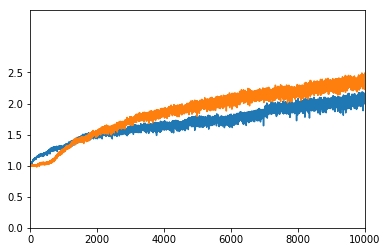

In [360]:
#plt.yticks(np.arange(0, 1, step=0.2))
#plt.yticks(np.arange(0, 1.5, step=0.5))
plt.axis([0,10000,0,3.5])
plt.yticks(np.arange(0, 3, step=0.5))
plt.plot(range(10000), rMean)
plt.plot(range(10000), rMean2)

plt.show()

#print(max(optimalMean2*100))

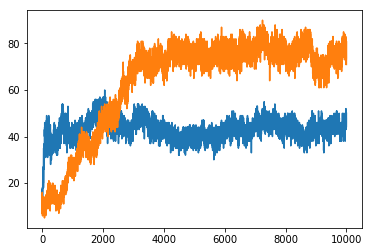

In [361]:
#plt.axis([0,10000,0,2.5])
plt.plot(range(10000),optimalMean*100)
plt.plot(range(10000),optimalMean2*100)
plt.show()

[[0.16743389526971386, 1], [1.2962488569324764, 1], [0.6237343868931569, 1], [-1.580179007053337, 1], [-0.3529035498417033, 1], [-0.05746007422951564, 1], [0.4949000554297657, 1], [-0.10550588513822483, 1], [1.9027964331617921, 1], [1.9398741786891427, 1]]
